# Convolutional Neural Networks

Convolutional neural networks have become some of the most widely used networks in the field of image recognition. In this notebook we will briefly illustrate the main features of convolutional neural networks.

## What is a convolutional neural network?

Simply put a convolutional neural network is any neural network that contains at least convolutional layer.

## Okay, so what is a convolutional layer?

A convolutional layer is a layer in which a convolutional filter passes along an input matrix.

### Okay, so what is a convolutional filter?

A convolutional filter is a matrix which is smaller than the input matrix matrix. This matrix is convolved with the input matrix as part of the convolutional layer. Perhaps this is best illustrated by an example, imagine we have a $5\times5$ input matrix:

$$\begin{bmatrix} 1 & 2 & 1 & 4 & 3\\ 3 & 0 & 1 & 2 & 5 \\ 0 & 2 & 4 & 0 & 0 \\ 0 & 1 & 2 & 1 & 0 \\ 1 & 3 &4 & 6 & 2 \end{bmatrix}$$

Now we can create our convoluitonal filter (which must be smaller than $5\times5$), so lets pick a $2\times2$ matrix
$$\begin{bmatrix} 0 & 1 \\ -1 & 0 \end{bmatrix}$$

This filter is convolved with the input matrix which involves:
1. Slicing the input matrix into $2\times2$ (to match the filter size) sub matrices
2. For each sub-matrix calculating the convolution with the filter by
    1. Element-wise multiplication
    2. Summation of the results

So let's take the first $2\times2$ sub matrix of the input matrix as the top-left corner of the $5\times5$ matrix.
$$\begin{bmatrix} 1 & 2 \\ 3 & 0 \end{bmatrix}$$
we now need to do the element-wise multiplication and summing of this sub matrix with the filter:
$$\begin{bmatrix} 1 & 2 \\ 3 & 0 \end{bmatrix} \times \begin{bmatrix} 0 & 1 \\ -1 & 0 \end{bmatrix} \rightarrow \begin{bmatrix} 0 & 2 \\ -3 & 0 \end{bmatrix} = 0 + 2 -3 + 0 = -1$$

Then we can slide this filter across the input matrix to create an output matrix (at this point one has to decide how we are going to handle the edge cases, here we will let our $5\times5$ matrix reduce to a $4\times4$ matrix).
$$\begin{bmatrix} -1 & 1 & 3 & 1 \\ 0 & -1 & -2 & 5 \\ 2 & 3 & -2 & -1 \\ 0 & -1 & -3 & -6 \end{bmatrix}$$

## What is so great about convolutional networks?

Convolutional networks are very simple, they are just a different kind of layer in neural network where each neuron in the layer effectively is effectively one of the output pixels in our output matrix. Each one of those neurons is only connected to the number of input pixels corresponding to the filter size (in our example above $2\times2=4$ input values).

It is just a neural network with fewer connections than a fully connected network! So why are people using this in almost all image recognition tasks?

It turns out that convolutional neural networks have one very important feature for image processing tasks. Becasue the convolutional filter (also called a kernel) slides across the image it means that if the filter encounters a particular sub-matrix pattern it gives the same result. That is the convolutional layer is inherently translation invariant. So no matter where in your image the straight line or circle lies an appropriate convolutional filter will pick out these features. 

The other very important feature is that a convolutional network only has weights for each pixel in its kernel (so for a $4\times4$ kernel that would be 16 weights) and the number of weights is independent on the image size.




## Our first convolutional neural network

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

import matplotlib.style #Some style nonsense
import matplotlib as mpl #Some more style nonsense


#Set default figure size
#mpl.rcParams['figure.figsize'] = [12.0, 8.0] #Inches... of course it is inches
mpl.rcParams["legend.frameon"] = False
mpl.rcParams['figure.dpi']=200 # dots per inch

#Useful for debugging problems
print(tf.__version__)

2.18.0


### For this example we are going to download the CIFAR10 dataset (which has hooks built in to Keras)
Much of this code was heavily inspired by the Tensorflow convolutional neural network tutorial.
https://www.tensorflow.org/tutorials/images/cnn

In [2]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

### Does the data look correct?
The training dataset comprises of 60,000 images of things like airplanes, trucks, frogs. Here we will plot the first 25 images in the training dataset to see what kind of images we are going to be training our network on.

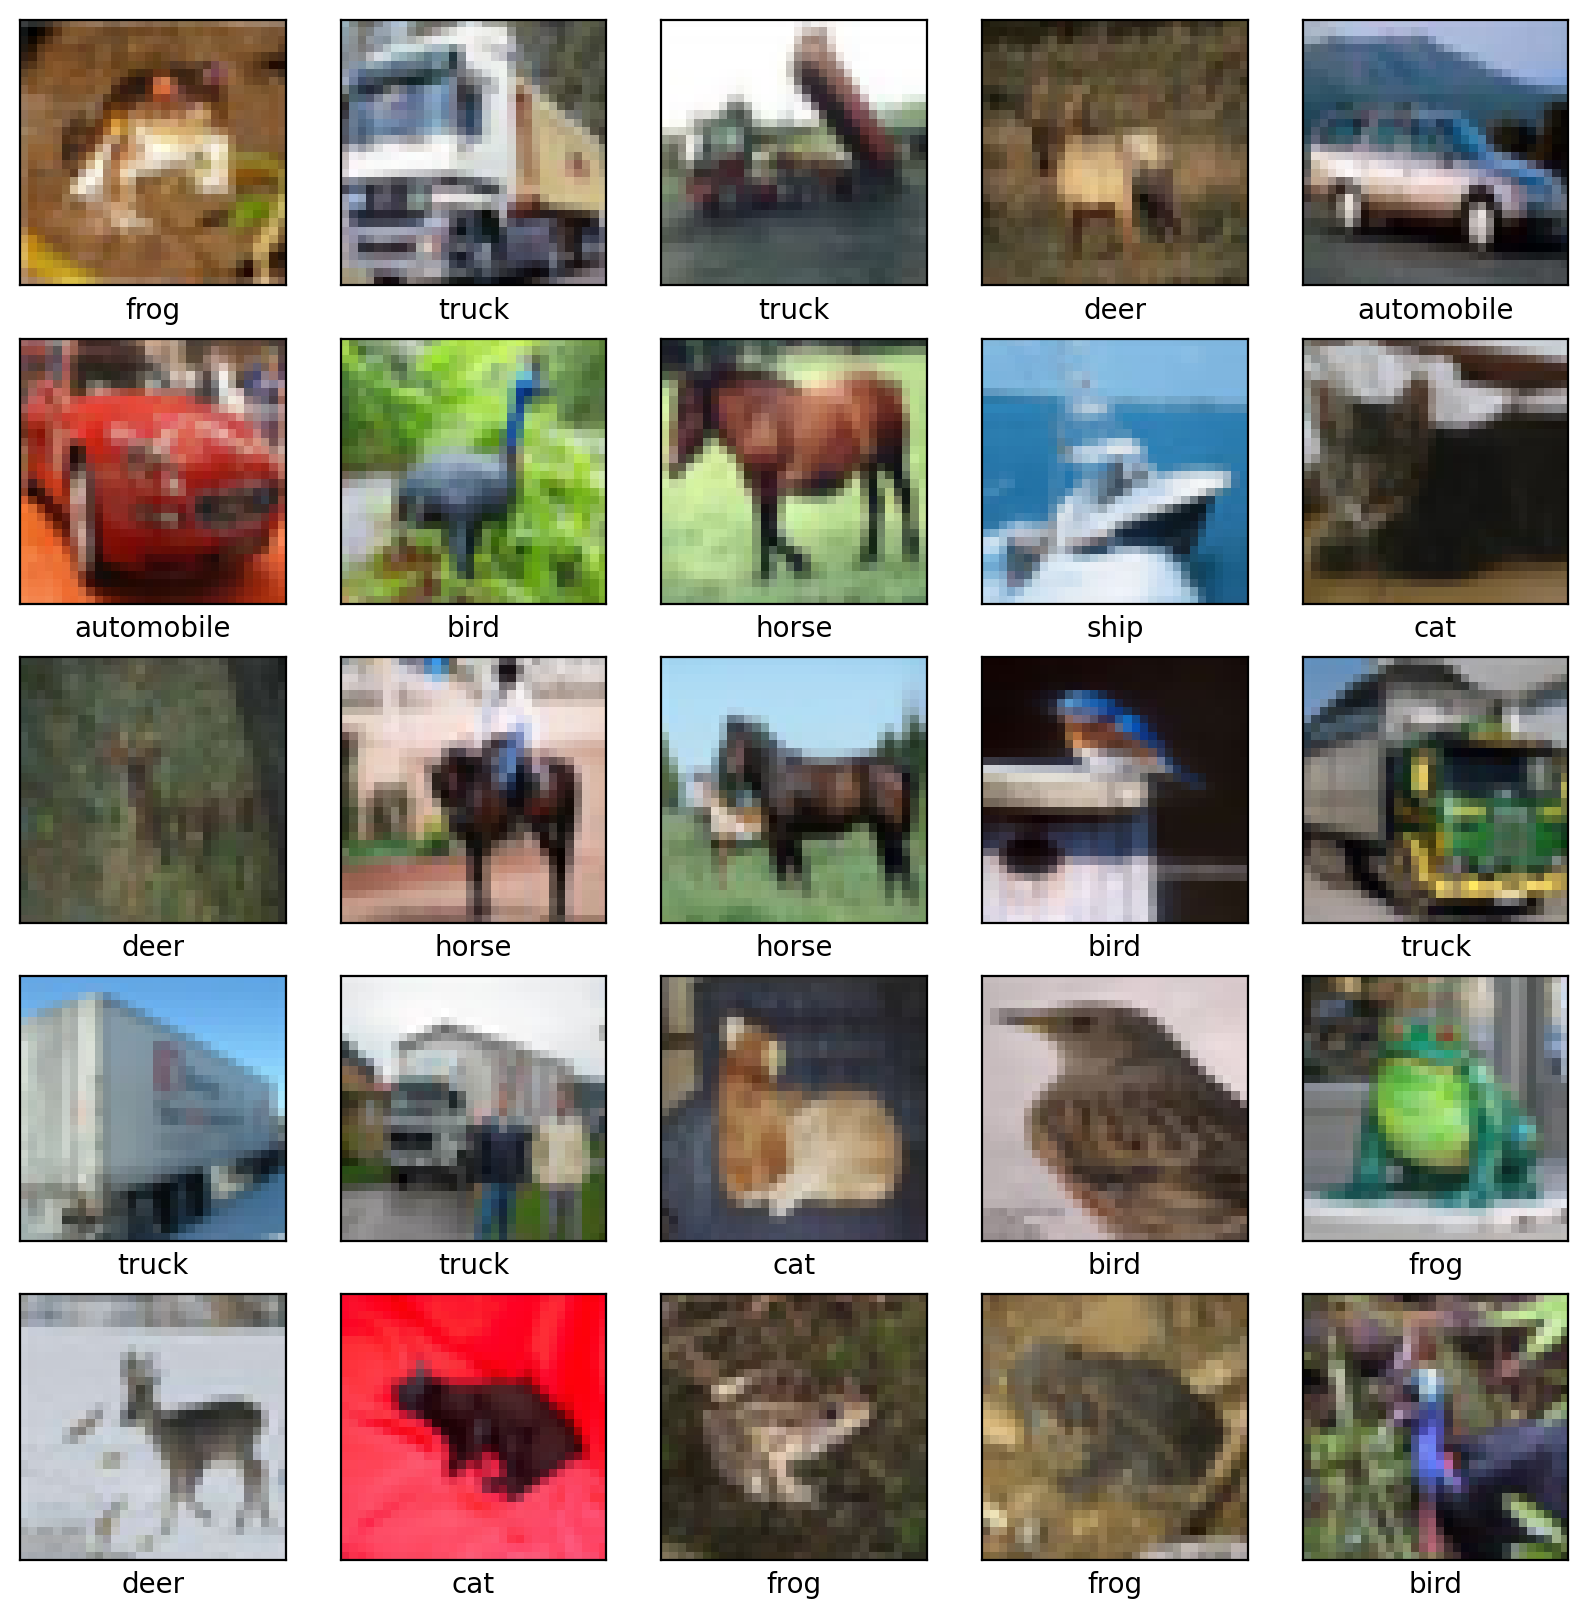

In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

## Let's make a convolutional neural network

In the six lines of code below we define our convolutional neural network. The network is just a stack of `Conv2D` and `MaxPooling2D` layers. The `Conv2D` layer does the convolution (as you might expect) whilst the `MaxPooling2D` layer just downsamples the image by taking the maximum from a group of pixels (in this case the maximum of each $2\times 2$ pixel subset).

If you look at the first layer we define the input shape to be $(32, 32, 3)$ which corresponds to $32 \times 32$ pixels in each image and three colours in each image (red, green and blue).


In [4]:
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(32, 32, 3)))
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))

Let's display our network architechture so far

In [5]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,320 (220.00 KB)

 Trainable params: 56,320 (220.00 KB)

 Non-trainable params: 0 (0.00 B)

You'll notice as the model progresses we move from having $32 \times 32 \times 3$ numbers representing each image in the input to having fewer pixels in each subsequent layer $30 \times 30$ (2 pixels lost in each dimension due to using a $3 \times 3$ convolution filter) then $15 \times 15$ then $13 \times 13$ then $6 \times 6$ then $4 \times 4$. But as we go through the image we increase the number of channels from $3$ in the input image to $32$ and finally $64$. These two go hand in hand with smaller pixel maps we can computationally afford to have more of them.

### Generating an output layer
Finally we need to add some layers to our networks to allow us to do some image classification. So we will need to end up with a network that can produce something which can be compared to the 10 labels. 

So we will add a layer that will flatten the three-dimensional $(4,4,64)$ output layer of the last convolution to make a one-dimensional layer of length 1024. Then we will add two fully connected (Dense) layers and end up with a layer of output size 10 that can be compared with our 10 image labels.

In [6]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(10))

So our full network looks like this.

In [7]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

### Time to train
The two steps remaining in the training are compiling our model and then fitting it to the training data

## Tips
* Make sure you understand what the `from_logits=True` part of the loss function means.
* What does the `accuracy` metric calculate?


In [8]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.3509 - loss: 1.7546 - val_accuracy: 0.5376 - val_loss: 1.2751
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.5708 - loss: 1.2044 - val_accuracy: 0.6310 - val_loss: 1.0537
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.6380 - loss: 1.0227 - val_accuracy: 0.6370 - val_loss: 1.0319
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.6808 - loss: 0.9109 - val_accuracy: 0.6900 - val_loss: 0.9002
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.7052 - loss: 0.8424 - val_accuracy: 0.6714 - val_loss: 0.9479
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.7309 - loss: 0.7686 - val_accuracy: 0.6880 - val_loss: 0.9236
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.7545 - loss: 0.7029 - val_accuracy: 0.6970 - val_loss: 0.8978
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.7700 - lo

### Evaluate model performance

313/313 - 1s - 4ms/step - accuracy: 0.7186 - loss: 0.8898


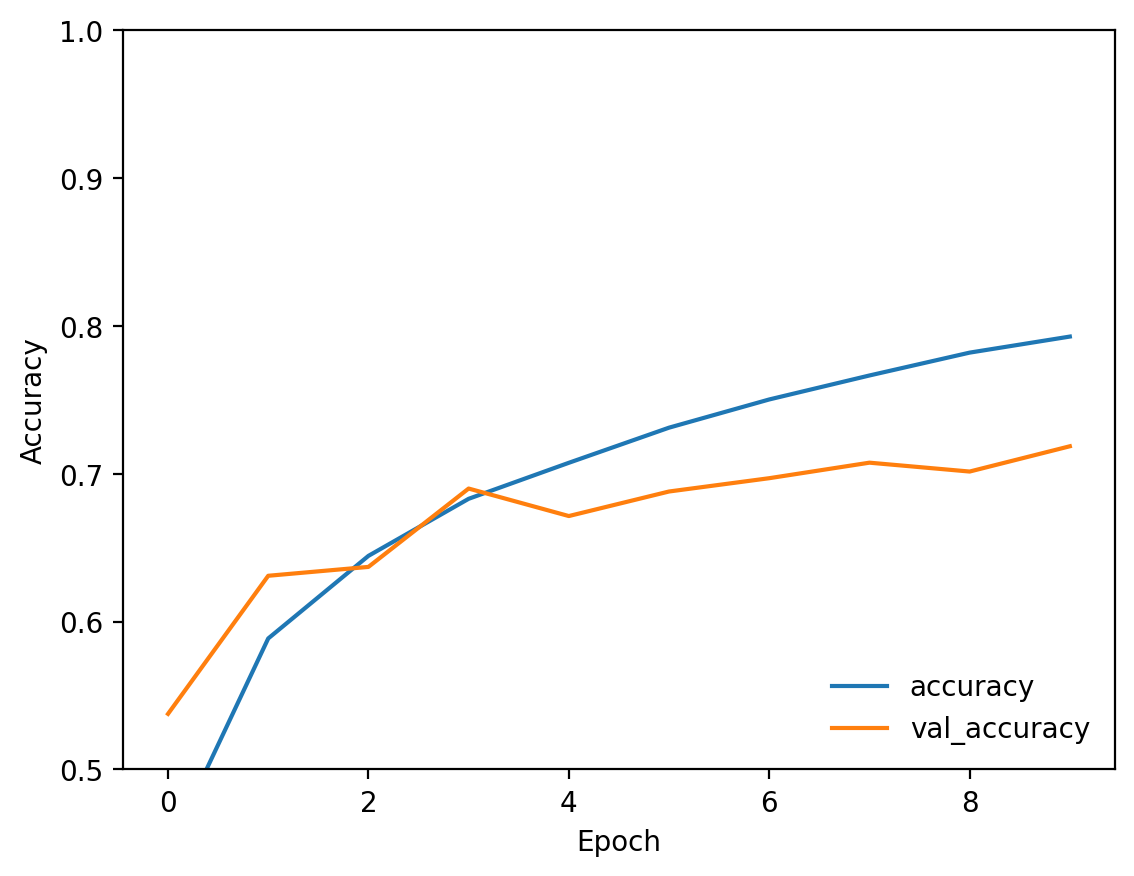

In [9]:


plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

### Summary
So our model got to achieve an accuracy of 77.9% on the training dataset, but only 70.6% on the validation (test) data set. As the training and testing accuracies diverge a little you can see we have clearly overfitted our model to the training data set. We will come back to this topic again in the course.

### Suggested tasks
* How much better can you do in terms of validation accuracy?
* How would you quantify the performance of the model?
* Is the performance of the model the same for every label?
* Can you produce a confusion matrix for the model?